# **Sike AI Challenge**

A Jupyter Notebook for Visualization of Crime Data in Los Angeles Since 2010

Created by John Dang

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Read crime data into pandas dataframe
crime_df = pd.read_csv("Crime_Data_from_2010_to_Present.csv")

In [3]:
#Display crime data frame and dimensions
print("Crime Data Frame Dimensions: " + str(crime_df.shape))
crime_df.head()

Crime Data Frame Dimensions: (1841205, 26)


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,11/10/2010,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,01/04/2014,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


## Crime Distribution in 21 LAPD Divisions

In [4]:
# List 21 LAPD divisions
print("The number of LAPD divisions is " + str(len(crime_df["Area Name"].unique())) + ". \n")
LAPD_div = crime_df["Area Name"].unique()
print(LAPD_div)

The number of LAPD divisions is 21. 

['77th Street' 'Olympic' 'Southeast' 'Topanga' 'Central' 'Northeast'
 'Foothill' 'Mission' 'Van Nuys' 'Newton' 'N Hollywood' 'West Valley'
 'Pacific' 'Devonshire' 'Rampart' 'Southwest' 'Hollenbeck' 'Harbor'
 'Hollywood' 'West LA' 'Wilshire']


In [5]:
#Create dictionary of crime codes to crime description
crime_dict = pd.Series(crime_df["Crime Code Description"].values,index=crime_df["Crime Code"]).to_dict()
crime_dict

{626: 'INTIMATE PARTNER - SIMPLE ASSAULT',
 510: 'VEHICLE - STOLEN',
 745: 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
 110: 'CRIMINAL HOMICIDE',
 668: 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
 440: 'THEFT PLAIN - PETTY ($950 & UNDER)',
 763: 'STALKING',
 442: 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
 624: 'BATTERY - SIMPLE ASSAULT',
 670: 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
 649: 'DOCUMENT FORGERY / STOLEN FELONY',
 480: 'BIKE - STOLEN',
 210: 'ROBBERY',
 821: 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
 220: 'ATTEMPTED ROBBERY',
 437: 'RESISTING ARREST',
 888: 'TRESPASSING',
 341: 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
 660: 'COUNTERFEIT',
 230: 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
 647: 'THROWING OBJECT AT MOVING VEHICLE',
 951: 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
 930: 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
 740: 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
 330: 'BURGLARY FROM VEH

In [6]:
# load LAPD division shapefile into geopandas
LAPDdiv_df = gp.read_file("lapd-divisions/lapd division.shx")
LAPDdiv_df

,slug,set,kind,external_i,name,display_na,name_1,url,number,phone_numb,address,square_mil,geometry
0,77th-street-lapd-division,LAPD Divisions,LAPD Division,12,77th Street,77th Street LAPD Division,None,http://www.lapdonline.org/77th_street_communit...,12,213-485-4164,7600 S. Broadway,11.3334694611,POLYGON ((-118.3148948951553 34.00371678060566...
1,central-lapd-division,LAPD Divisions,LAPD Division,1,Central,Central LAPD Division,None,http://www.lapdonline.org/central_community_po...,1,213-485-3294,251 E. 6th St.,4.9051505769,POLYGON ((-118.2243816590658 34.06850962588265...
2,devonshire-lapd-division,LAPD Divisions,LAPD Division,17,Devonshire,Devonshire LAPD Division,None,http://www.lapdonline.org/devonshire_community...,17,818-832-0633,10250 Etiwanda Ave.,48.310389692,POLYGON ((-118.4896378723103 34.31514263477411...
3,foothill-lapd-division,LAPD Divisions,LAPD Division,16,Foothill,Foothill LAPD Division,None,http://www.lapdonline.org/foothill_community_p...,16,818-756-8861,12760 Osborne St.,46.5372672192,POLYGON ((-118.3829144583268 34.29425373977321...
4,harbor-lapd-division,LAPD Divisions,LAPD Division,5,Harbor,Harbor LAPD Division,None,http://www.lapdonline.org/harbor_community_pol...,5,310-726-7700,2175 John S. Gibson Blvd.,32.0275914881,POLYGON ((-118.2815067203804 33.86634772230949...
5,hollenbeck-lapd-division,LAPD Divisions,LAPD Division,4,Hollenbeck,Hollenbeck LAPD Division,None,http://www.lapdonline.org/hollenbeck_community...,4,323-342-4100,2111 E. 1st St.,15.5398083185,POLYGON ((-118.1766487515499 34.11222915167837...
6,hollywood-lapd-division,LAPD Divisions,LAPD Division,6,Hollywood,Hollywood LAPD Division,None,http://www.lapdonline.org/hollywood_community_...,6,213-972-2971,1358 N. Wilcox Ave.,13.3377561414,POLYGON ((-118.3091817047329 34.12739268205956...
7,mission-lapd-division,LAPD Divisions,LAPD Division,19,Mission,Mission LAPD Division,None,http://www.lapdonline.org/mission_community_po...,19,818-838-9800,11121 N. Sepulveda Blvd.,25.0940732236,POLYGON ((-118.4199900853765 34.32916473191149...
8,newton-lapd-division,LAPD Divisions,LAPD Division,13,Newton,Newton LAPD Division,None,http://www.lapdonline.org/newton_community_pol...,13,323-846-6547,3400 S. Central Ave.,9.7701450586,POLYGON ((-118.2422842186189 34.03754056722302...
9,northeast-lapd-division,LAPD Divisions,LAPD Division,11,Northeast,Northeast LAPD Division,None,http://www.lapdonline.org/northeast_community_...,11,213-485-2563,3353 San Fernando Rd.,29.2578766522,"POLYGON ((-118.3013509628453 34.1581737185605,..."


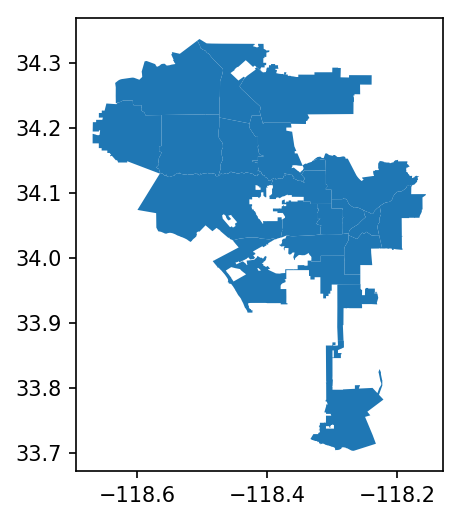

In [7]:
# plot map of LAPD divisons on longitude and latitude plot
fig = plt.figure(dpi = 150)
LAPDdiv_plot = LAPDdiv_df.plot(ax = plt.gca())

## Data Analysis On West Los Angeles

In [8]:
# Create pandas dataframe of crime data in West Los Angeles
westLA_df = crime_df.loc[crime_df["Area Name"] == "West LA"]

In [9]:
print("West LA Crime Data Frame Dimensions: " + str(westLA_df.shape))
westLA_df.head()

West LA Crime Data Frame Dimensions: (77221, 26)


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
43452,130600978,10/28/2013,10/24/2013,1800,8,West LA,809,956,"LETTERS, LEWD",NaN,...,NaN,IC,Invest Cont,956.0,998.0,NaN,NaN,9600 ARROWOOD DR,NaN,"(34.1069, -118.4055)"
54892,100812018,07/02/2010,07/02/2010,1620,8,West LA,853,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,SANTA MONICA,BUTLER,"(34.0456, -118.4519)"
56208,100811779,06/26/2010,06/26/2010,1700,8,West LA,885,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,10400 NORTHVALE RD,NaN,"(34.033, -118.414)"
57366,130809477,05/17/2013,05/17/2013,1545,8,West LA,835,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,MISSISSIPPI,WESTWOOD,"(34.0453, -118.4329)"
57467,130810980,06/27/2013,06/27/2013,250,8,West LA,849,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,HOLT,PICO,"(34.0538, -118.3785)"


### Crime Occurrences in the last 10 Years in West Los Angeles

BURGLARY                                                        8021
BURGLARY FROM VEHICLE                                           7769
THEFT PLAIN - PETTY ($950 & UNDER)                              6942
THEFT OF IDENTITY                                               6830
BATTERY - SIMPLE ASSAULT                                        5817
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036    4695
VEHICLE - STOLEN                                                3555
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                 3553
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    3244
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        3198
Name: Crime Code Description, dtype: int64

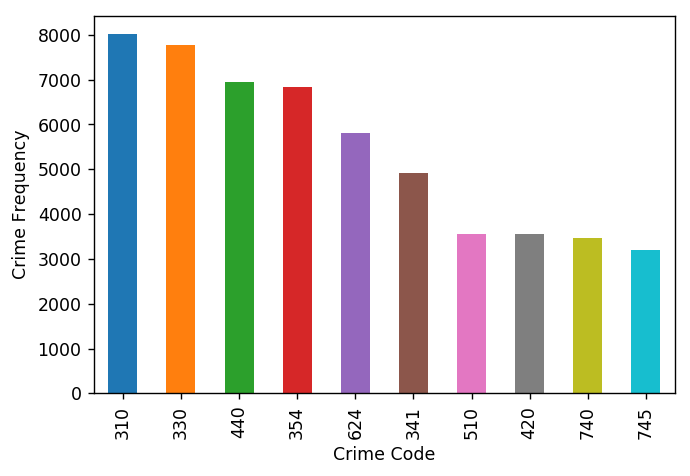

In [10]:
plt.figure(dpi = 125)
plt.xlabel("Crime Code")
plt.ylabel("Crime Frequency")
westLA_df["Crime Code"].value_counts()[0:10].plot(kind='bar', ax = plt.gca())
westLA_df["Crime Code Description"].value_counts()[0:10]

# Common Types of Crime in West Los Angeles

# Most Affected Age Groups

# Additional Insights and Inference